In [15]:
import pandas as pd
from diagrams import Diagram, Node, Edge, Cluster
from diagrams.aws.compute import EC2ContainerRegistryImage
from diagrams.aws.compute import EC2
from diagrams.aws.database import RDS
from diagrams.aws.network import ELB
from diagrams.aws.ml import SagemakerModel, SagemakerTrainingJob


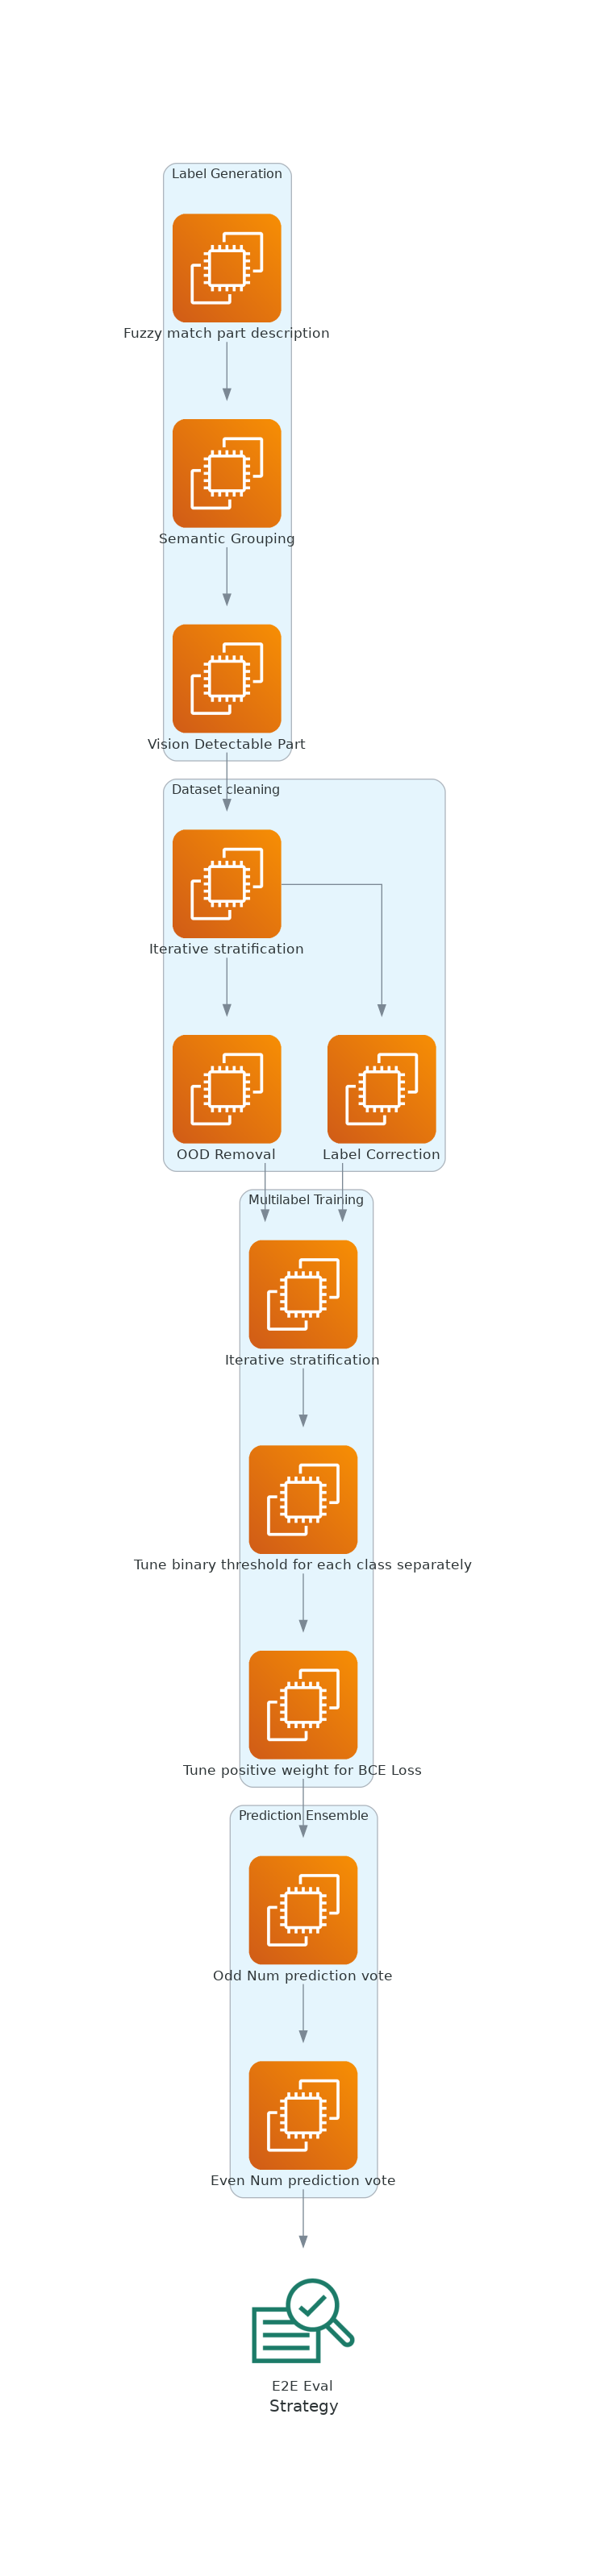

In [18]:
visCount = 0
with Diagram(name="Strategy", show=False, direction="TB") as fig:
    # Node("aa") >> Node("nn")
        with Cluster("Label Generation") as c1:
            b = EC2("Fuzzy match part description") >> EC2("Semantic Grouping") >> EC2("Vision Detectable Part")
        with Cluster("Dataset cleaning") as c2:
            c1 = EC2("Iterative stratification")

            c = EC2("OOD Removal")
            d = EC2("Label Correction")
            b >> c1 >> [c, d]
        with Cluster("Multilabel Training") as c2:
            e = EC2("Iterative stratification")
            f = EC2("Tune binary threshold for each class separately")
            g = EC2("Tune positive weight for BCE Loss")
            # h = e >> f >> g
            a1 = [c, d] >>  e >> f >> g
        with Cluster("Prediction Ensemble") as c2:
            i = EC2("Odd Num prediction vote")
            j = EC2("Even Num prediction vote")
            a2 = a1 >> i >> j
        m3 = SagemakerTrainingJob("E2E Eval")
        a2 >> m3
fig